In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test_data = pd.read_csv("insurance.csv")
df = test_data
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


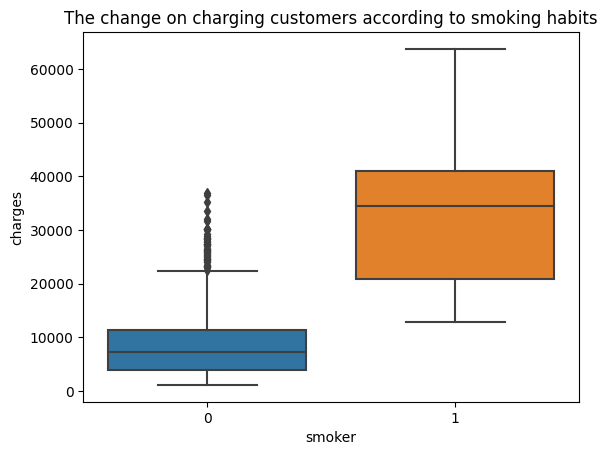

In [ ]:
sns.boxplot(x=df['smoker'], y=df['charges'])
plt.title("The change on charging customers according to smoking habits")
plt.show()

In [ ]:
#As the age increases and customers' smoking habits exist, the charges tend to get higher

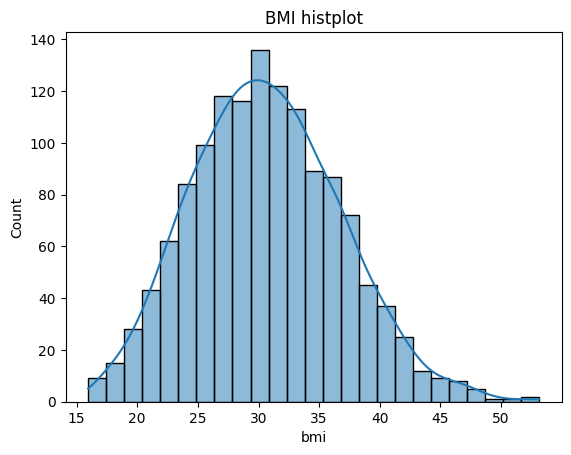

In [ ]:
sns.histplot(df['bmi'], kde=True)
plt.title("BMI histplot")
plt.show()

In [ ]:
#Customers' BMI are located around 30

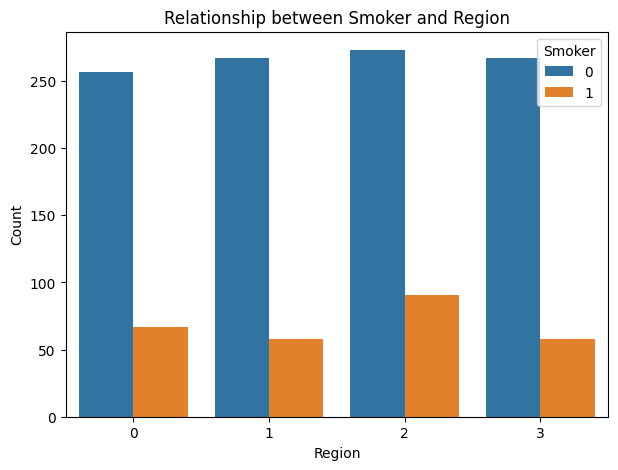

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df['region'], hue=df['smoker'])
plt.title("Relationship between Smoker and Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.show()

In [40]:
#Region 3 has the most smokers and also most non-smokers

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

data_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

linear_scores = cross_val_score(linear_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
dt_scores = cross_val_score(decision_tree_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
rf_scores = cross_val_score(random_forest_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

linear_rmse = np.sqrt(-linear_scores.mean())
dt_rmse = np.sqrt(-dt_scores.mean())
rf_rmse = np.sqrt(-rf_scores.mean())

print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)

Linear Regression RMSE: 6171.325988488797
Decision Tree RMSE: 7346.202801930938
Random Forest RMSE: 5060.775507555656


In [45]:
#Random Forest is the best model for our dataset.

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 16696024.217214525
Mean Absolute Error: 2386.6407476384534
